In [11]:
import torch
import torch.nn as nn

import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors


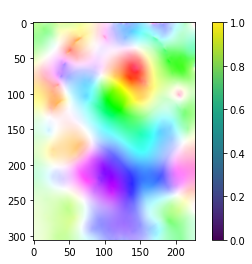

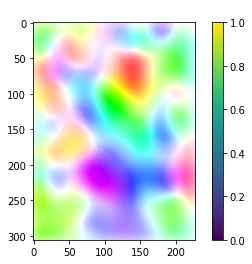

In [12]:
def showFlow(def_x):
    x = def_x.squeeze().numpy()[0,:,:]
    y = def_x.squeeze().numpy()[1,:,:]
    #show flow map for numpy
    H, W = x.shape
    rho = np.sqrt(x*x+y*y)
    theta = np.arctan2(x,-y)
    theta2 = (-theta+np.pi)/(2.0*np.pi)
    rho = np.clip(rho/np.percentile(rho, 99),0,1)
    hsv = np.stack((theta2,rho,np.ones((H,W))),axis=2)
    rgb = mcolors.hsv_to_rgb(hsv)
    return rgb


out_image = torch.load('/Users/falcolentzsch/Develope/FVMB/FVMB/exercise_2/cpp/output_flow.pth').permute(2,0,1)
adam_image = torch.load('/Users/falcolentzsch/Develope/FVMB/FVMB/exercise_2/cpp/adam_flow.pth')
rgb = showFlow(out_image)
rgb_nn = showFlow(adam_image.data.cpu())

plt.title('Output: Horn-Schunk in c++',color='white')
plt.imshow(rgb)
plt.colorbar()
plt.show()
plt.title('Output: Adam-B-Spline in c++',color='white')
plt.imshow(rgb_nn)
plt.colorbar()
plt.show()

